<a href="https://colab.research.google.com/github/Krunal-375/GreenAIEdunet/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Load the dataset
data = pd.read_csv('green_tech_data.csv')

In [3]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [4]:
# Check for null values
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


sustainability
0    85
1    15
Name: count, dtype: int64


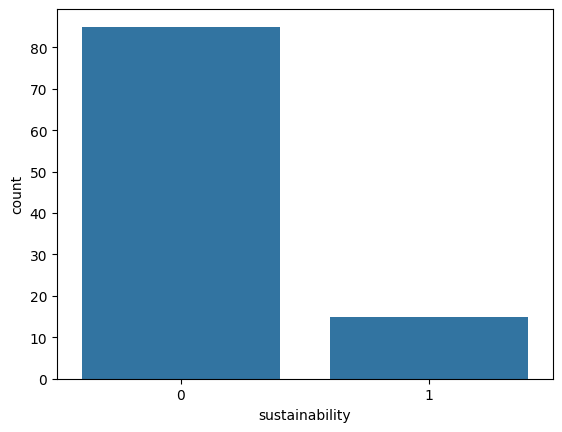

In [7]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()


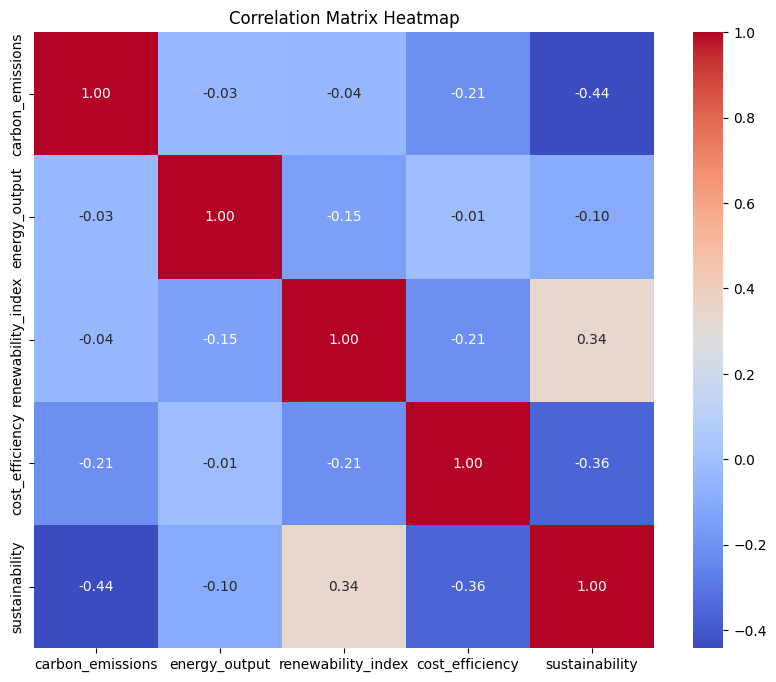

In [8]:
# prompt: create heatmap

# Create a correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
#define X and Y for column: carbon_emissions	energy_output	renewability_index	cost_efficiency	sustainability

X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
Y = data['sustainability']

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
xtrain.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [32]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [33]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


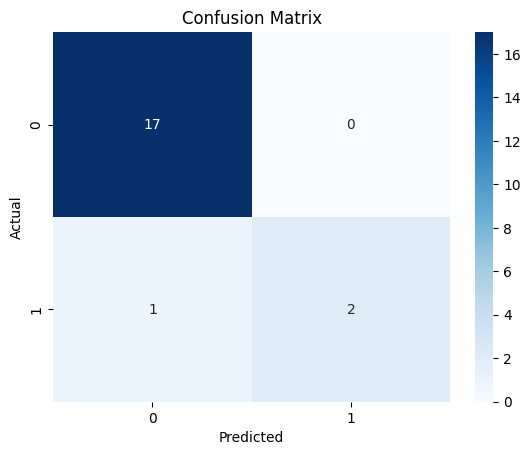

Confusion Matrix:
[[17  0]
 [ 1  2]]


In [34]:
#confusion matrix
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

In [35]:
#classification report
cr = classification_report(ytest, ypred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [37]:
coefficient = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficient)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [38]:
import joblib
#save the model to a file
joblib.dump(model,'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [39]:
# prompt: perform next ste

# Load the saved model
loaded_model = joblib.load('lrmodel_sustainable.pkl')

# Example new data for prediction (replace with your actual data)
new_data = pd.DataFrame({
    'carbon_emissions': [0.5],
    'renewability_index': [0.8],
    'cost_efficiency': [0.7]
})

# Make predictions on the new data
new_prediction = loaded_model.predict(new_data)

print(f"Prediction for new data: {new_prediction}")

Prediction for new data: [1]
